In [16]:
import numpy as np
import pandas as pd
import os as OS
import joblib

In [11]:
class Perceptron:
  def __init__(self,eta: float= None, epochs: int = None):
    self.weights = np.random.randn(3)*1e-4
    training = (eta is not None ) and (epochs is not None)
    if training:
      print(f"initial weights before training: \n{self.weights}")
    self.eta = eta
    self.epochs = epochs
  def __z__outcome(self,inputs,weights ):
    return np.dot(inputs,weights)

  def activation_function(self,z):
    return np.where(z>0,1,0)
  def fit(self,X, y):
    self.X = X
    self.y = y
    X_with_bias = np.c_[self.X,-np.ones((len(self.X),1))]
    print(f"X with Bias: \n{X_with_bias}")

    for epoch in range(self.epochs):
      print("--"*10)
      print(f"for epoch >> {epoch}")
      print("--"*10)

      z = self.__z__outcome(X_with_bias,self.weights)
      y_hat = self.activation_function(z)
      print(f"predicted values after forward pass: \n {y_hat}")
      self.error = self.y-y_hat
      print(f"error: \n{self.error}")
      self.weights = self.weights +self.eta*np.dot(X_with_bias.T,self.error)
      print(f"updated weigths after epoch: {epoch+1}/{self.epochs}: \n{self.weights}")
      print("##"*10)

  def predict(self,X):
    X_with_bias = np.c_[X,-np.ones((len(X),1))]
    z = self.__z__outcome(X_with_bias,self.weights)
    return self.activation_function(z)

  def total_loss(self):
    total_loss = np.sum(self.error)
    print(f"\ntotal loss: {total_loss}\n")
    return total_loss


  def __create_dir_return_path(self,model_dir,filename):
    OS.makedirs(model_dir,exist_ok = True)
    return OS.path.join(model_dir,filename)

  def save(self,filename, model_dir = None):
    if model_dir is not None:
      model_file_path = self.__create_dir_return_path(model_dir,filename)
      joblib.dump(self, model_file_path)
    else:
      model_file_path = self.__create_dir_return_path("model",filename)
      joblib.dump(self,model_file_path)
  def load(self,filepath):
    return joblib.load(filepath)


In [6]:
AND = {
    "x1" : [0,0,1,1],
    "x2" : [0,1,0,1],
    "y" : [0,0,0,1]
}
df_AND = pd.DataFrame(AND)
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [7]:
def prepare_data(df, target_col = 'y'):
  X = df.drop("y",axis = 1)
  y = df[target_col]
  return X,y

In [12]:
X,y = prepare_data(df_AND)
ETA = 0.1
EPOCHS = 10

model_and = Perceptron(eta = ETA, epochs=EPOCHS)

initial weights before training: 
[-6.32760493e-05  1.53764721e-04 -1.34299970e-04]


In [13]:
model_and.fit(X,y)
_ = model_and.total_loss

X with Bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted values after forward pass: 
 [1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weigths after epoch: 0/10: 
[-0.10006328 -0.09984624  0.2998657 ]
####################
--------------------
for epoch >> 1
--------------------
predicted values after forward pass: 
 [0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weigths after epoch: 1/10: 
[-6.32760493e-05  1.53764721e-04  1.99865700e-01]
####################
--------------------
for epoch >> 2
--------------------
predicted values after forward pass: 
 [0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weigths after epoch: 2/10: 
[0.09993672 0.10015376 0.0998657 ]
####################
--------------------
for epoch >> 3
--------------------
predicted values after forward pass: 
 [0 1 1 1]
error: 
0    0
1   -1
2   -1
3   

In [17]:
model_and.save(filename="and.model")

In [18]:
reload_and = Perceptron().load(filepath="/content/model/and.model")

In [19]:
reload_and.predict(X=[[1,1]])

array([1])

In [20]:
reload_and.predict(X=[[0,1]])

array([0])

In [27]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [34]:
def save_plot(df, model, filename= "plot.png",plot_dir = "plots"):
  X,y = prepare_data(df)
  def _create_base_plot(df):
    df.plot(kind = "scatter", x = "x1",y = "x2", c="y", s =100,cmap = "coolwarm")
    plt.axhline(y=0, color = "black", linestyle = "--",linewidth = 1)
    plt.axvline(x=0, color = "black", linestyle = "--",linewidth = 1)

    figure = plt.gcf()#get current fig
    figure.set_size_inches(10,8)
  def _plot_decision_regions(X,y,classifier,resolution = 0.02):
    colors = ("cyan","lightgreen")
    cmap = ListedColormap(colors)

    X = X.values #as array
    x1 = X[:,0]
    x2 = X[:,1]

    x1_min ,x1_max = x1.min()-1,x1.max()+1
    x2_min ,x2_max = x2.min()-1,x2.max()+1

    #mesh grid
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x1_min,x1_max,resolution))
    y_hat = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    y_hat = y_hat.reshape(xx1.shape)

    plt.contourf(xx1,xx2, y_hat,alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    plt.plot()

  _create_base_plot(df)
  _plot_decision_regions(X,y,model)

  OS.makedirs(plot_dir,exist_ok = True)
  plot_path = OS.path.join(plot_dir,filename)
  plt.savefig(plot_path)

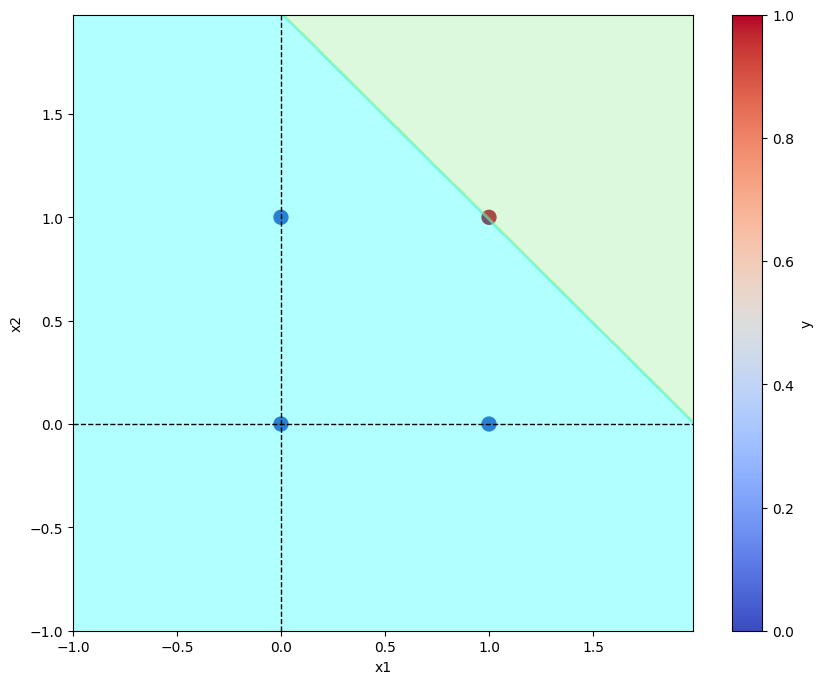

In [35]:
save_plot(df_AND, model_and, filename= "plot_and.png")